# statistic of fading 二阶统计特性

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.fftpack import fft, fftshift, ifft
from scipy import signal
from scipy.ndimage import shift

In [16]:
# 简单将上述代码封装成了一个类
# fsamp 采样频率，fm 最大多普勒平移, T 总时长， E deta^2, N0 波到达个数 
class jacke_hz:
    def __init__(self, fsamp, fm, T, E, N0, x=np.linspace(-1, 5, 500)):
        self.fsamp = fsamp
        self.fm = fm
        self.T = T
        self.E = E
        self.N0 = N0
        self.x = x
        self.ht = self.get_ht()
        self.Tc = 9/16/np.pi/fm
        self.pdf = self.get_pdf()

    # 得到包络ht
    def get_ht(self):
        # 随机相位
        phase = (np.random.randn(1, self.N0) * 2 * math.pi)[0]

        #N为夹角，必定为正，入射波和平面夹角必定为正
        N = (self.N0*2+1)*2
        t = np.arange(0, self.T, 1/self.fsamp)
        beta_n = np.linspace(1, self.N0, self.N0) * math.pi/(self.N0+1)

        wn = 2 * math.pi * self.fm * np.cos(2*math.pi*np.linspace(1, self.N0, self.N0)/N)
        wd = 2 * math.pi * self.fm

        Ts = np.zeros(t.shape[0])
        Tc = np.zeros(t.shape[0])
        for i in range(self.N0):
            Tc = Tc+math.cos(beta_n[i])*np.cos(wn[i]*t+phase[i])
            Ts = Ts+math.sin(beta_n[i])*np.cos(wn[i]*t+phase[i])

        Tc = Tc*2 + math.sqrt(2)*np.cos(wd*t)
        Ts = Ts*2
        ht = self.E*(Tc+Ts*1j)/math.sqrt(2*self.N0+1)

        return ht

    def get_pdf(self):
        kernel = stat.gaussian_kde(np.abs(self.ht))
        a = kernel(self.x)
        return a

In [94]:
fsamp = 10**4
T = 1
E = 1
fm = 100
t = np.arange(0, 1, 1/fsamp)

In [95]:
ht_e1 = jacke_hz(fsamp, fm, T=1, E=1, N0=200)

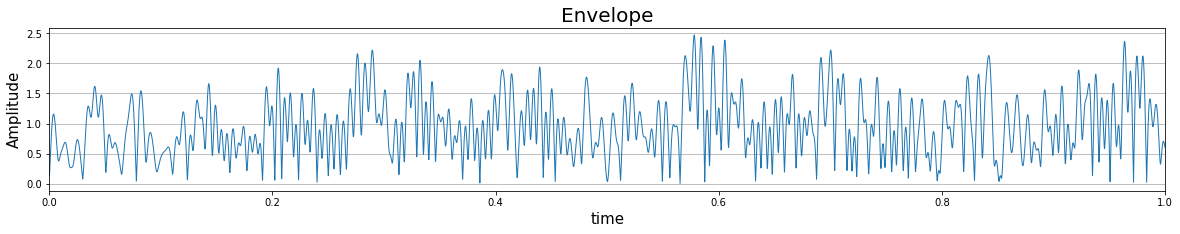

In [96]:
fig = plt.figure(figsize=(20, 3))
ax1 = fig.add_subplot(111) 
ax1.plot(t, abs(ht_e1.ht),
         linewidth=1, linestyle='solid', label='close value')
ax1.grid(axis='y')
ax1.set_xlabel('time', fontsize=15)
ax1.set_ylabel('Amplitude', fontsize=15)
plt.title('Envelope', fontsize = 20)
# plt.ylim(-0.001, 0.005)
plt.xlim(0, 1)
# plt.legend(fontsize = 20)
plt.savefig('Envelope_fm100.svg',)

In [97]:
rms_e1 = np.sqrt(np.sum(abs(ht_e1.ht)*abs(ht_e1.ht))/10**4)

In [98]:
p_e1 = abs(ht_e1.ht)/rms_e1
R = np.arange(0, 2.02, 0.02)
times = np.zeros(R.shape[0])
for i in range(0, R.shape[0]-1):
    for j in range(0, p_e1.shape[0]-1):
        if(p_e1[j]<R[i] and p_e1[j+1]>=R[i]):
            times[i] = times[i] + 1

In [99]:
#我的理想型
#fm=100,理想
# p = np.arange(0, 2, 0.01)
p_dream = np.sqrt(2*np.pi)*fm*R*np.e**(-R*R)

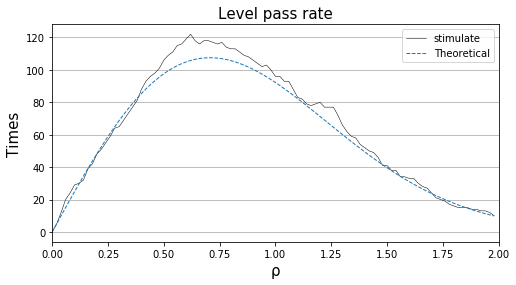

In [100]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)
ax1.plot(R[0:-1], times[0:-1], label='stimulate', c='black', linewidth=0.5)
ax1.plot(R[0:-1], p_dream[0:-1], linestyle='--', linewidth=1, label='Theoretical')
ax1.set_xlabel(chr(961), fontsize=15)
ax1.set_ylabel('Times',fontsize=15)
plt.legend(fontsize = 10)
plt.grid(axis='y')
plt.title('Level pass rate', fontsize=15)
plt.xlim(0, 2)
fig.savefig('Level pass rate fm100.svg',bbox_inches="tight")

# 平均衰弱持续时间

(0.02, 2)

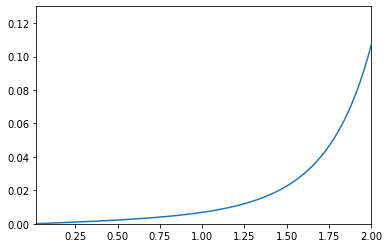

In [101]:
tao = (np.e**(R[1:]**2)-1)/(R[1:]*fm*np.sqrt(2*np.pi))
plt.plot(R[1:], tao)
plt.ylim(0, 0.13)
plt.xlim(0.02, 2)

In [102]:
time = np.zeros(R.shape[0])
for i in range(1, R.shape[0]):
    for j in range(p_e1.shape[0]):
        if(p_e1[j]<R[i]):
            time[i] = time[i] + 1
time = time/fsamp

In [103]:
tao = (np.e**(R[1:]**2)-1)/(R[1:]*fm*np.sqrt(2*np.pi))

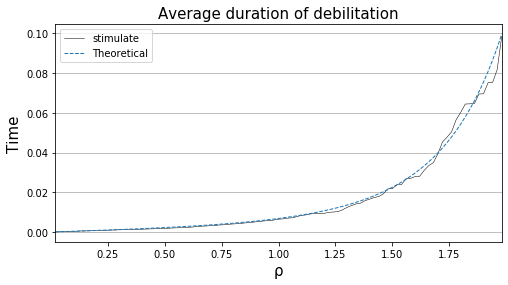

In [104]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)
ax1.plot(R[1:-1], time[1:-1]/times[1:-1], label='stimulate', c='black', linewidth=0.5)
ax1.plot(R[1:-1], tao[:-1], linestyle='--', linewidth=1, label='Theoretical')
ax1.set_xlabel(chr(961), fontsize=15)
ax1.set_ylabel('Time', fontsize=15)
plt.legend(fontsize=10)
plt.grid(axis='y')
plt.title('Average duration of debilitation', fontsize=15)
plt.xlim(0.02, 1.98)
fig.savefig('Average duration of debilitation fm100.svg',bbox_inches="tight")